In [1]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [6]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape


(768, 9)

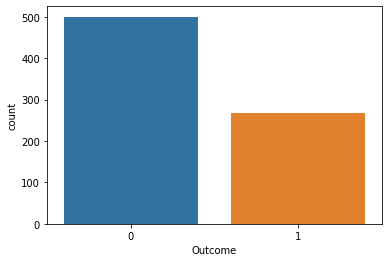

In [8]:
sns.countplot(x='Outcome',data=df)

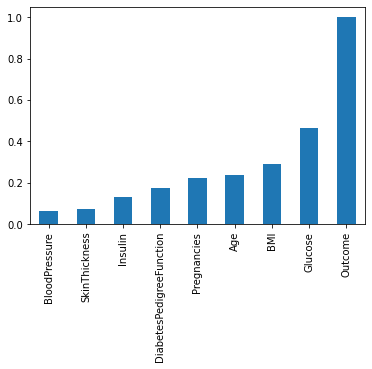

In [9]:
df.corr()['Outcome'].sort_values().plot(kind='bar')

In [10]:
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler= MinMaxScaler()

In [15]:
X_train =scaler.fit_transform(X_train)

In [16]:
X_test =scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Dense,Dropout

In [19]:
X_train.shape

(576, 8)

In [20]:
model =Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [21]:
model.fit(x=X_train,y=y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
18/18 [==============================] - 1s 16ms/step - loss: 0.6696 - val_loss: 0.6503
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6440 - val_loss: 0.6395
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6376 - val_loss: 0.6330
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6318 - val_loss: 0.6266
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6247 - val_loss: 0.6201
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6198 - val_loss: 0.6136
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6129 - val_loss: 0.6071
Epoch 8/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6072 - val_loss: 0.6003
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5998 - val_loss: 0.5918
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5920 - val_loss: 0.5835
Epoch 11

In [22]:
losses =pd.DataFrame(model.history.history)

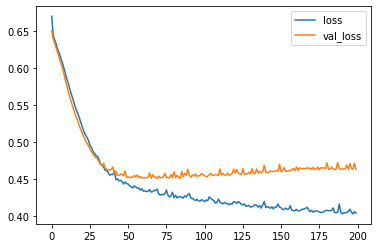

In [23]:
losses.plot()

In [24]:
model =Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [27]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop] )

Epoch 1/600
18/18 [==============================] - 0s 9ms/step - loss: 0.6919 - val_loss: 0.6724
Epoch 2/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6667 - val_loss: 0.6612
Epoch 3/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6586 - val_loss: 0.6558
Epoch 4/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6523 - val_loss: 0.6506
Epoch 5/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6468 - val_loss: 0.6449
Epoch 6/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6406 - val_loss: 0.6393
Epoch 7/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6349 - val_loss: 0.6339
Epoch 8/600
18/18 [==============================] - 0s 3ms/step - loss: 0.6285 - val_loss: 0.6268
Epoch 9/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6217 - val_loss: 0.6194
Epoch 10/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6139 - val_loss: 0.6112
Epoch 11/

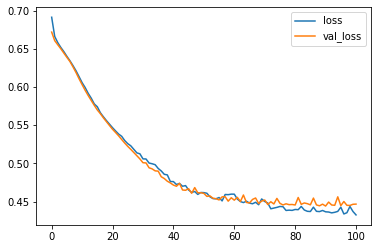

In [28]:
model_loss= pd.DataFrame(model.history.history)
model_loss.plot()

In [29]:
predictions =model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       124
           1       0.73      0.66      0.69        68

    accuracy                           0.79       192
   macro avg       0.77      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



In [32]:
print(confusion_matrix(y_test,predictions))

[[107  17]
 [ 23  45]]
